# Importing the necessary libraries

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [50]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                # Convert the image from BGR to RGB
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [51]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



# Data Visualization & Preprocessing

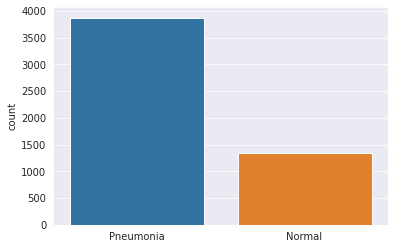

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)        

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

**Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

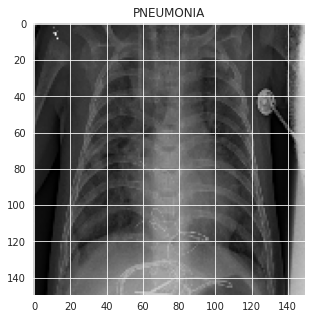

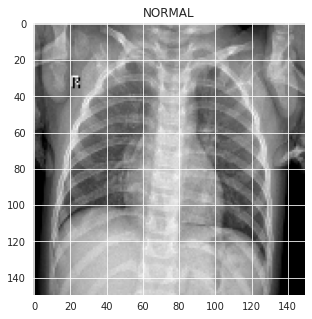

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [54]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [55]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


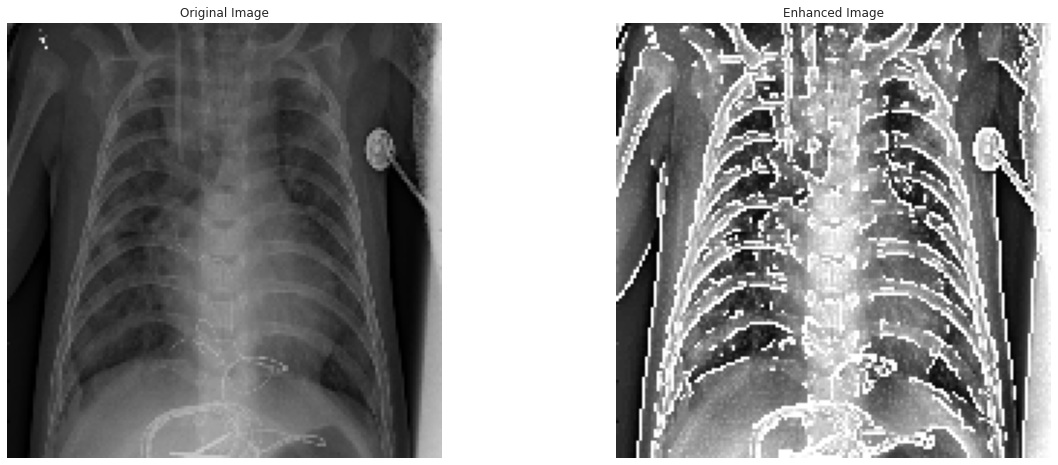

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'train' contains the images and labels as a list of [image, label] pairs
train2 = []  # This will store the enhanced images and their labels
z = 1

# Loop through each image in the train dataset
for image_data in train:
    image = image_data[0]  # Extract the image
    label = image_data[1]  # Extract the label


    # Split the image into its R, G, and B channels
    b, g, r = cv2.split(image)

    # Apply CLAHE to each channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6, 6))
    b = clahe.apply(b)
    g = clahe.apply(g)
    r = clahe.apply(r)

    # Merge the channels back into a single RGB image
    enhanced_image = cv2.merge([b, g, r])

    # Create a high-pass filter by subtracting a low-pass filter (using a box filter to avoid blurring) from the original
    low_pass = cv2.boxFilter(enhanced_image, ddepth=-1, ksize=(3, 3))
    high_pass = cv2.subtract(enhanced_image, low_pass)

    # Combine the high-pass filter with the original image to enhance edges
    enhanced_image = cv2.add(enhanced_image, high_pass)

    # Apply Canny edge detection (it returns a single-channel image)
    feature = cv2.Canny(enhanced_image, 250, 300, apertureSize=3)
    
    # Apply morphological operations to remove noise
    kernel = np.ones((3, 3), np.uint8)  # You can adjust kernel size
    feature_cleaned = cv2.morphologyEx(feature, cv2.MORPH_OPEN, kernel)  # Removes small white noise
    
    # Convert the single-channel Canny result to 3 channels
    feature_rgb = cv2.cvtColor(feature, cv2.COLOR_GRAY2BGR)

    # Add the Canny edges back to the enhanced RGB image
    final_output = cv2.add(enhanced_image, feature_rgb)


    # Save the final enhanced image with its label in train2
    train2.append([final_output, label])

    print(z)
    z += 1

# Example: Display an original and enhanced image side by side
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
if len(train[0][0].shape) == 3:
    plt.imshow(cv2.cvtColor(train[0][0], cv2.COLOR_BGR2RGB))
else:
    plt.imshow(train[0][0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
if len(train2[0][0].shape) == 3:
    plt.imshow(cv2.cvtColor(train2[0][0], cv2.COLOR_BGR2RGB))
else:
    plt.imshow(train2[0][0], cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


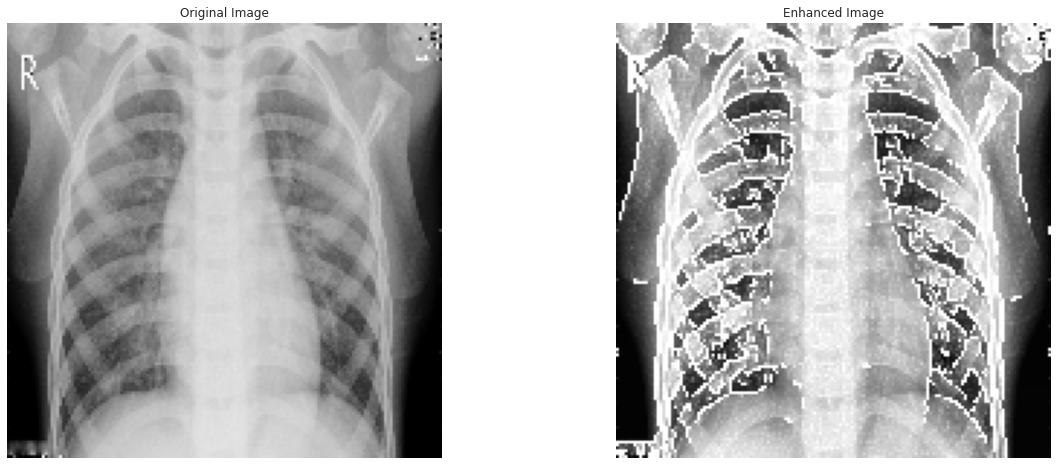

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


test2 = []  # This will store the enhanced images and their labels
z = 1

# Loop through each image in the train dataset
for image_data in test:
    image = image_data[0]  # Extract the image
    label = image_data[1]  # Extract the label


    # Split the image into its R, G, and B channels
    b, g, r = cv2.split(image)

    # Apply CLAHE to each channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6, 6))
    b = clahe.apply(b)
    g = clahe.apply(g)
    r = clahe.apply(r)

    # Merge the channels back into a single RGB image
    enhanced_image = cv2.merge([b, g, r])

    # Create a high-pass filter by subtracting a low-pass filter (using a box filter to avoid blurring) from the original
    low_pass = cv2.boxFilter(enhanced_image, ddepth=-1, ksize=(3, 3))
    high_pass = cv2.subtract(enhanced_image, low_pass)

    # Combine the high-pass filter with the original image to enhance edges
    enhanced_image = cv2.add(enhanced_image, high_pass)

    # Apply Canny edge detection (it returns a single-channel image)
    feature = cv2.Canny(enhanced_image, 250, 300, apertureSize=3)
    
    # Apply morphological operations to remove noise
    kernel = np.ones((3, 3), np.uint8)  # You can adjust kernel size
    feature_cleaned = cv2.morphologyEx(feature, cv2.MORPH_OPEN, kernel)  # Removes small white noise
    
    # Convert the single-channel Canny result to 3 channels
    feature_rgb = cv2.cvtColor(feature, cv2.COLOR_GRAY2BGR)

    # Add the Canny edges back to the enhanced RGB image
    final_output = cv2.add(enhanced_image, feature_rgb)


    # Save the final enhanced image with its label in train2
    test2.append([final_output, label])

    print(z)
    z += 1

# Example: Display an original and enhanced image side by side
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
if len(test[0][0].shape) == 3:
    plt.imshow(cv2.cvtColor(test[0][0], cv2.COLOR_BGR2RGB))
else:
    plt.imshow(test[0][0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
if len(test2[0][0].shape) == 3:
    plt.imshow(cv2.cvtColor(test2[0][0], cv2.COLOR_BGR2RGB))
else:
    plt.imshow(test2[0][0], cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


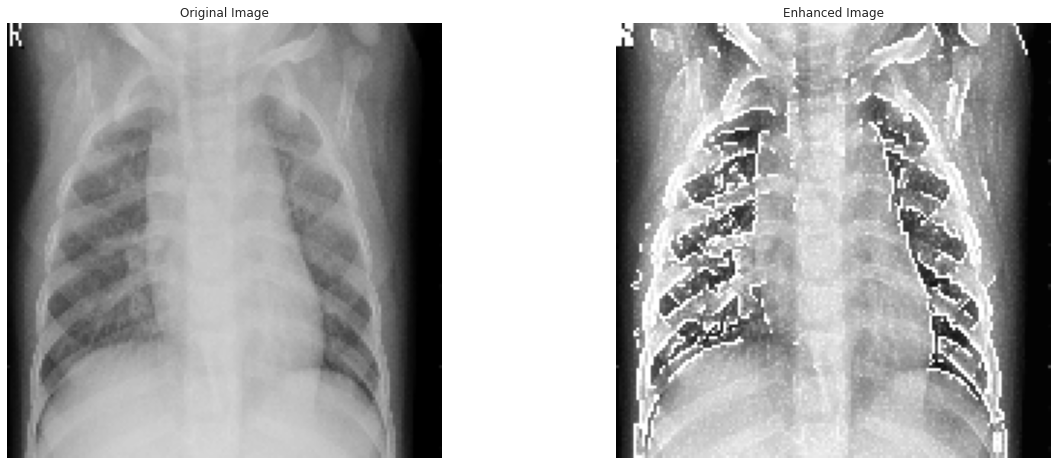

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'train' contains the images and labels as a list of [image, label] pairs
val2 = []  # This will store the enhanced images and their labels
z = 1

# Loop through each image in the train dataset
for image_data in val:
    image = image_data[0]  # Extract the image
    label = image_data[1]  # Extract the label


    # Split the image into its R, G, and B channels
    b, g, r = cv2.split(image)

    # Apply CLAHE to each channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6, 6))
    b = clahe.apply(b)
    g = clahe.apply(g)
    r = clahe.apply(r)

    # Merge the channels back into a single RGB image
    enhanced_image = cv2.merge([b, g, r])

    # Create a high-pass filter by subtracting a low-pass filter (using a box filter to avoid blurring) from the original
    low_pass = cv2.boxFilter(enhanced_image, ddepth=-1, ksize=(3, 3))
    high_pass = cv2.subtract(enhanced_image, low_pass)

    # Combine the high-pass filter with the original image to enhance edges
    enhanced_image = cv2.add(enhanced_image, high_pass)

    # Apply Canny edge detection (it returns a single-channel image)
    feature = cv2.Canny(enhanced_image, 250, 300, apertureSize=3)
    
    # Apply morphological operations to remove noise
    kernel = np.ones((3, 3), np.uint8)  # You can adjust kernel size
    feature_cleaned = cv2.morphologyEx(feature, cv2.MORPH_OPEN, kernel)  # Removes small white noise
    
    # Convert the single-channel Canny result to 3 channels
    feature_rgb = cv2.cvtColor(feature, cv2.COLOR_GRAY2BGR)

    # Add the Canny edges back to the enhanced RGB image
    final_output = cv2.add(enhanced_image, feature_rgb)


    # Save the final enhanced image with its label in train2
    val2.append([final_output, label])

    print(z)
    z += 1

# Example: Display an original and enhanced image side by side
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
if len(val[0][0].shape) == 3:
    plt.imshow(cv2.cvtColor(val[0][0], cv2.COLOR_BGR2RGB))
else:
    plt.imshow(val[0][0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
if len(val2[0][0].shape) == 3:
    plt.imshow(cv2.cvtColor(val2[0][0], cv2.COLOR_BGR2RGB))
else:
    plt.imshow(val2[0][0], cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


In [59]:
train_img=[]
i=1
for image_data in train:
    image = image_data[0]  # Extract the image
    label = image_data[1]  # Extract the label
    
    train_img.append([image, label])
enhanced_train_img=train2

train_img.extend(enhanced_train_img)

In [60]:
test_img=[]
i=1
for image_data in test:
    image = image_data[0]  # Extract the image
    label = image_data[1]  # Extract the label
    
    test_img.append([image, label])
enhanced_test_img=test2

test_img.extend(enhanced_test_img)

In [16]:
len(test_img)

1248

In [61]:
val_img=[]
i=1
for image_data in val:
    image = image_data[0]  # Extract the image
    label = image_data[1]  # Extract the label
    
    val_img.append([image, label])
enhanced_val_img=val2

val_img.extend(enhanced_val_img)

In [18]:
len(val_img)

32

In [62]:
image_train = []
label_train = []

image_val = []
label_val = []

image_test = []
label_test = []

for feature, label in train_img:
    image_train.append(feature)
    label_train.append(label)

for feature, label in test_img:
    image_test.append(feature)
    label_test.append(label)
    
for feature, label in val_img:
    image_val.append(feature)
    label_val.append(label)

In [63]:
image_train=np.array(image_train)
label_train=np.array(label_train)
image_test=np.array(image_test)
label_test=np.array(label_test)
image_val=np.array(image_val)
label_val=np.array(label_val)

In [64]:
# resize data for deep learning
img_size=150
image_train = image_train.reshape(-1, img_size, img_size, 3)
image_val = image_val.reshape(-1, img_size, img_size, 3)
image_test = image_test.reshape(-1, img_size, img_size, 3)


In [65]:
image_train.shape

(10432, 150, 150, 3)

In [66]:
#Importing the necessary libraries
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [67]:
# Load VGG16 model without the top layer
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

In [68]:
# Set trainable layers
conv_base.trainable = False
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True


In [69]:
# Create the Sequential model and add the conv_base and FC layers
model = Sequential()
model.add(conv_base)
model.add(Flatten())

# Adding fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Optional: Adding dropout to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Optional: Adding another dropout layer
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification


In [70]:
#Compiling the model with parameters best suited for the task at hand:
model.compile(
    loss='binary_crossentropy', #Best for binary classification
    optimizer = keras.optimizers.Adam(learning_rate=0.001), #Good starting LR for dataset of this size
    metrics=['accuracy'], #Looking for accuracy
)

In [72]:
#Fitting the model, with the ReduceLROnPlateau callback added to it to reduce the learning rate to take smaller steps in increasing the accuracy whenever the learning rate plateaus (goes in the wrong direction)
#Doing this with patience=1, meaning it will perform this if it even plateaus for one epoch, since only 10 epochs are used
#factor=0.1 means that for every time the learning rate is reduced, it is reduced by a factor of 0.1 - it also won't go lower than 0.00001
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=1, min_lr=0.00001, verbose=1)

#Fitting the model w/ the callback. ON VS CODE, batch size of 16 makes each epoch take around a minute in this case w/ good accuracy, making the whole training process 10 min, but on Kaggle it should take longer due to less computational resources:
history = model.fit(image_train, label_train, batch_size=32, epochs=10, verbose=2, callbacks = [reduce_lr],validation_data=[image_val,label_val])

Train on 10432 samples, validate on 32 samples
Epoch 1/10
 - 27s - loss: 0.3319 - accuracy: 0.8723 - val_loss: 0.3293 - val_accuracy: 0.7500
Epoch 2/10
 - 26s - loss: 0.2262 - accuracy: 0.8983 - val_loss: 0.2959 - val_accuracy: 0.9688
Epoch 3/10
 - 25s - loss: 0.2206 - accuracy: 0.9115 - val_loss: 0.4672 - val_accuracy: 0.9062
Epoch 4/10
 - 26s - loss: 0.2034 - accuracy: 0.9095 - val_loss: 0.1411 - val_accuracy: 0.9688

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/10
 - 26s - loss: 0.1727 - accuracy: 0.9122 - val_loss: 0.1309 - val_accuracy: 0.9688
Epoch 6/10
 - 26s - loss: 0.1452 - accuracy: 0.9252 - val_loss: 0.1250 - val_accuracy: 0.9688
Epoch 7/10
 - 26s - loss: 0.1367 - accuracy: 0.9299 - val_loss: 0.1602 - val_accuracy: 0.9375
Epoch 8/10
 - 26s - loss: 0.1280 - accuracy: 0.9360 - val_loss: 0.1270 - val_accuracy: 0.9688
Epoch 9/10
 - 26s - loss: 0.1224 - accuracy: 0.9433 - val_loss: 0.2266 - val_accuracy: 0.9062
Epoch 10/10
 - 26s - loss

In [73]:
print("Loss of the model is - " , model.evaluate(image_test,label_test)[0])
print("Accuracy of the model is - " , model.evaluate(image_test,label_test)[1]*100 , "%")

1248/1248 [==============================] - 3s 2ms/step
Loss of the model is -  1.5150370739762506
1248/1248 [==============================] - 3s 2ms/step
Accuracy of the model is -  81.08974099159241 %


**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

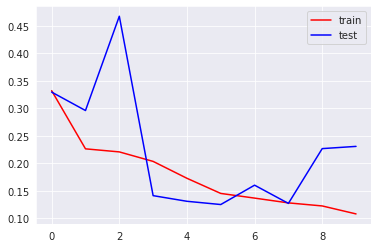

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

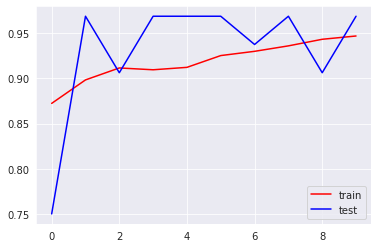

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [76]:
predictions = model.predict_classes(image_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [77]:
print(classification_report(label_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.77      0.99      0.87       780
   Normal (Class 1)       0.96      0.51      0.67       468

           accuracy                           0.81      1248
          macro avg       0.87      0.75      0.77      1248
       weighted avg       0.84      0.81      0.79      1248



In [78]:
cm = confusion_matrix(label_test,predictions)
cm

array([[771,   9],
       [227, 241]])